# Panorama des bibliothèques pour la dataviz avec Python

## 1. Remarques préalables

Ce document, quelque peu expérimental, vise à dresser un panorama des différentes bibliothèques Python pour la **visualisation de données**. Il s'organise sous la forme d'une quasi liste de course qui tente de cerner les cas d'usages propres à chaque bibliothèque et d'en identifier potentiellement quelques unes qui peuvent se distinguer du lot.

Il ne s'agira pas d'explorer ici d'autres bibliothèques sur lesquelles il est quasiment impossible de faire l'impasse lorsqu'on souhaite manipuler et visualiser des données. La liste peut être alongée, mais à minima, elle compte :
* [`numpy`](https://numpy.org/) : bibliothèque destinée au calcul numérique optimisé
* [`pandas`](https://pandas.pydata.org/) : bibliothèque destinée à la manipulation de données tabulaires

## 2. Mise en forme des données

In [1]:
import pandas as pd
import numpy as np

Nous travaillerons ici à partir de deux jeux de données relativement simple à explorer et prendre en main. Il est possible de les télécharger directement [ici](https://www.data.gouv.fr/fr/datasets/liste-et-localisation-des-musees-de-france/) et [ici](https://www.data.gouv.fr/fr/datasets/frequentation-des-musees-de-france-1/).

Dans un premier temps, nous allons simplement ouvrir les fichiers CSV à l'aide de `pandas`.

In [2]:
df_freq = pd.read_csv("data/frequentations.csv", sep=";")
df_musees = pd.read_csv("data/musees.csv", sep=";")

Pour notre travail, nous allons exclure un certain nombre de colonnes de ces tableaux qui ne nous intéresserons pas.

In [3]:
df_freq.drop(columns=[
    "date_appellation",
    "note",
    "commentaire",
    "id_museofile",
    "observations",
    "regions",
    "ville",
    "nomdep"
], inplace=True)

df_musees.drop(columns=[
    "cp",
    "telephone1",
    "fax",
    "fermeture_annuelle",
    "periode_ouverture",
    "jours_nocturnes",
    "date_appellation",
    "date_retrait_appellation_par_haut_conseil"
], inplace=True)

On peut rapidement visualiser les deux premières lignes de chaque fichier que l'on vient d'ouvrir et d'élaguer. Pour la suite de notre travail, nous récupérerons donc souvent les données à partir de ces deux variables `df_freq` (qui contient les données de fréquentation des musées) et `df_musees` (qui contient les métadonnées associées à chaque musée).

In [4]:
df_freq.head(2)

,ref_musee,nom_du_musee,annee,payant,gratuit,total
0,8109902,Muséum d'histoire naturelle Philadelphe Thomas,2009,789.0,3683.0,4472.0
1,8109903,Musée de l'Abbaye Saint-Michel,2009,2613.0,669.0,3282.0


In [5]:
df_musees.head(2)

,nom_du_musee,ref_musee,adr,ville,sitweb,region,departement,coordonnees_finales
0,Musée de la Résistance et de la Déportation de...,0126901,"3, Montée de l'Abbaye",NANTUA,www.musees.ain.fr,AUVERGNE-RHÔNE-ALPES,AIN,"46.152378,5.608744"
1,Musée des Manufactures de Dentelles,4316201,"14, avenue de la Gare",RETOURNAC,www.ville-retournac.fr/musee,AUVERGNE-RHÔNE-ALPES,HAUTE-LOIRE,"45.202545,4.035302"


## 3. Quelques éléments méthodologiques et pratiques

Il existe de nombreux ouvrages, de nombreuses règles ou principes de sémiologie graphique qu'il est souvent utile d'avoir à l'esprit pour réaliser des graphiques lisibles, pertinents et honnêtes (dans le sens où ils ne cherchent pas à tromper leur public).

Ici, je propose de m'appuyer sur l'article de Nicolas Rougier, [*"Tne simple rules for better figures"* (2014)](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833) car il aborde ces questions souvent rebattues pour les poser du point de vue du praticien, de celui qui, face à son outil informatique de visualisation de données préféré, doit effectuer des choix (celui de l'outil dans un premier temps) pour traduire le propos qu'il souhaite véhiculer à travers l'analyse et l'interprétation graphique d'un jeu de données spécifique.

Je tente ici d'en résumer, sous forme de liste, les points qui me paraissent les plus importants au regard de notre exploration des bibliothèques pour la visualisation de données avec Python :
* Quel est notre message ?
* Quel est notre public ?
* Il faut adapter le graphique à son support de communication
* Il ne faut pas se limiter aux paramètres par défaut de l'outil

## 4. Approche brutale avec Autoviz

`AutoViz` est une bibliothèque de visualisation de données Python qui permet de réaliser toute une batterie de visualisation de données automatiques à partir de n'importe quel jeu de données.

L'**approche est néanmoins vraiment brutale** puisqu'elle consiste à s'appuyer, à la fois sur le **typage des colonnes** mais aussi sur un **modèle d'apprentissage statistique** pour adapter les sorties visuelles aux motifs identifiés dans chaque colonne et aux relations entre les colonnes elles-mêmes pour tenter de réaliser les visualisations les plus pertinentes pour chaque cas.

Cela nécessite donc, au préalable, d'effectuer ce travail de typage rigoureux et de comprendre les tests automatiques (XGBoost) réalisés par la bibliothèque pour l'exploiter au mieux.

`Autoviz` est vraiment tournée vers la pratique de la **science des données** (*data science*) et en particulier l'idée d'identifier des **motifs spécifiques dans de grands jeux de données**. 

### 2. 1. Documentation

On peut retrouver toute la documentation à [cette adresse](https://github.com/AutoViML/AutoViz). A cela peut-on ajouter [cet article](https://towardsdatascience.com/autoviz-a-new-tool-for-automated-visualization-ec9c1744a6ad) qui détaille la philosophie de l'outil.

### 2. 2. En somme
* Prêt à l'emploi
* Orienté *data science*
* Utile pour les grands jeux de données
* Visualiser plus pour l'interprétation et la phase de recherche que pour la communication de résultats
* Peu d'options de paramétrage (automatique, comme son nom l'indique)
* N'est pas adapté à tous les jeux de données

In [6]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported AutoViz_Class version: 0.0.84. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


Shape of your Data Set loaded: (22447, 14)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  6
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  3
    14 Predictors classified...
        This does not include the Target column(s)
        9 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 6


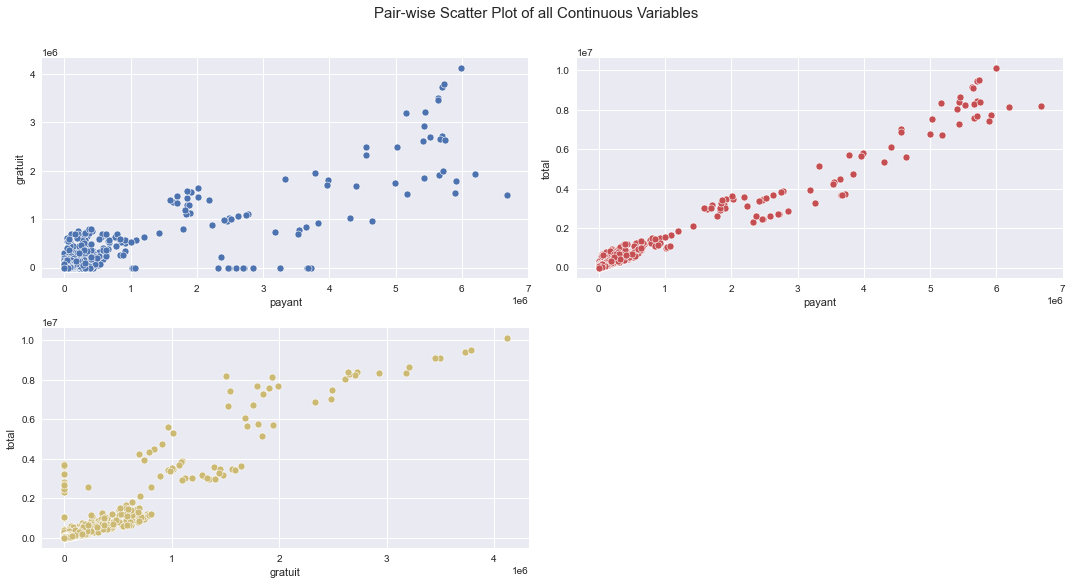

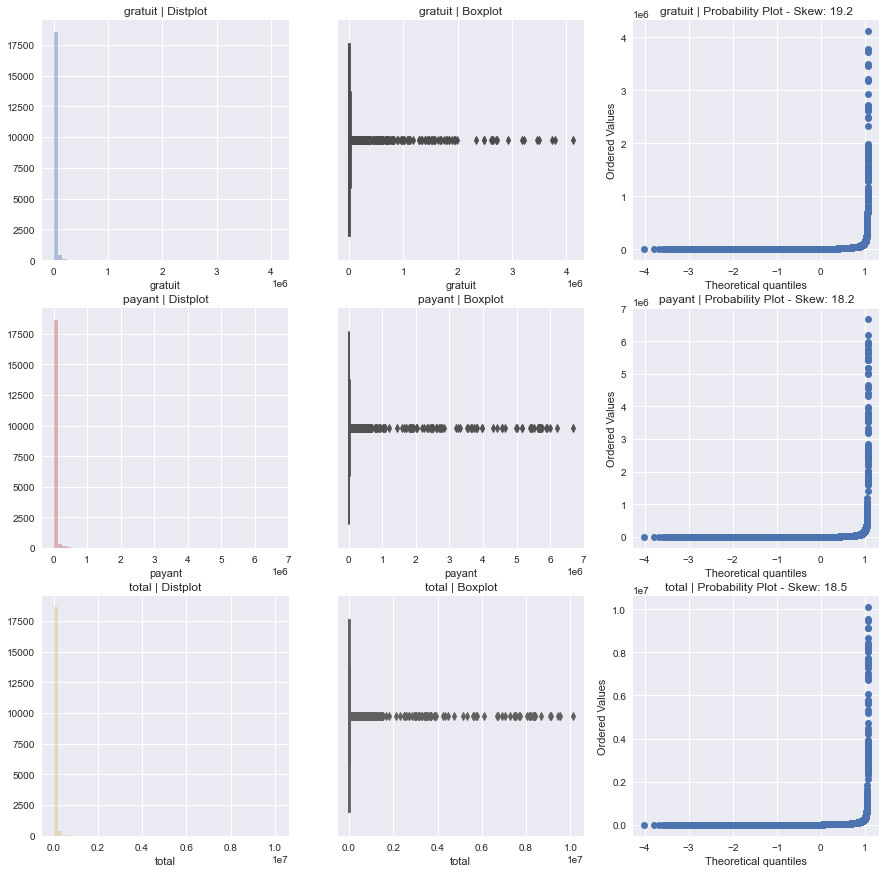

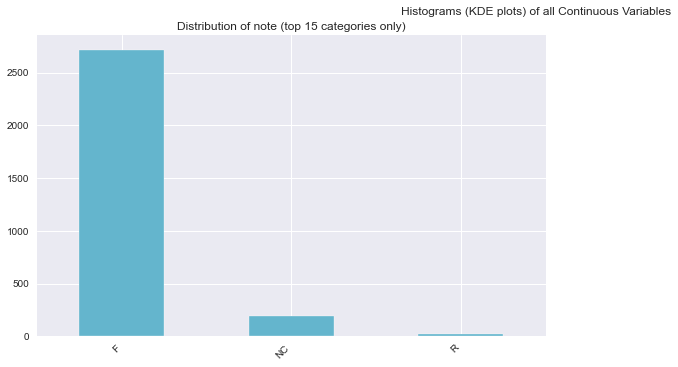

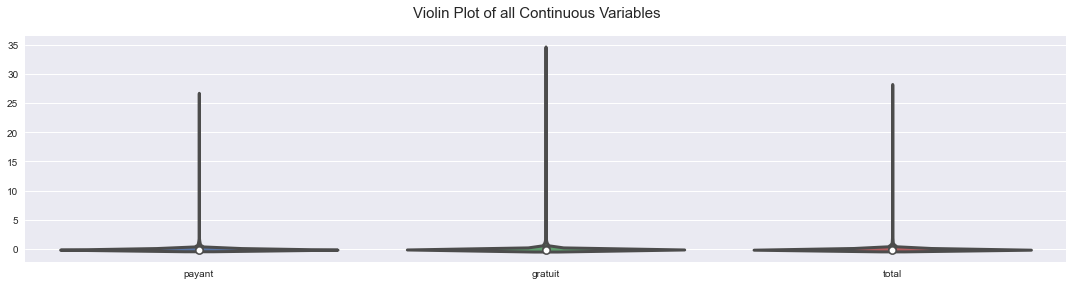

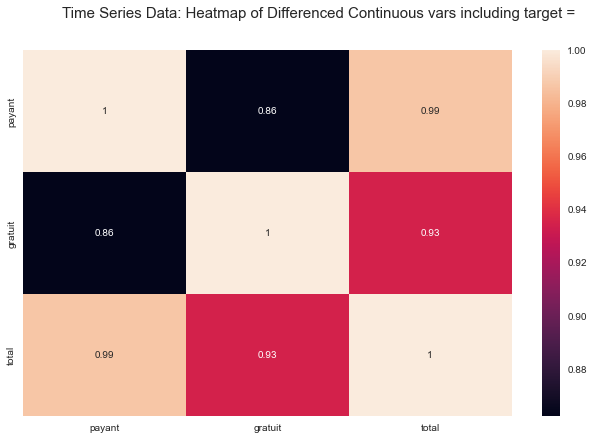

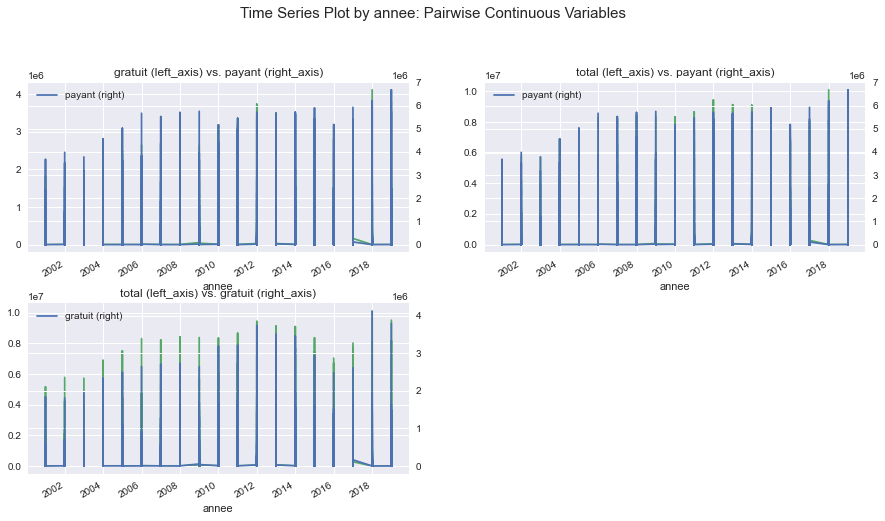

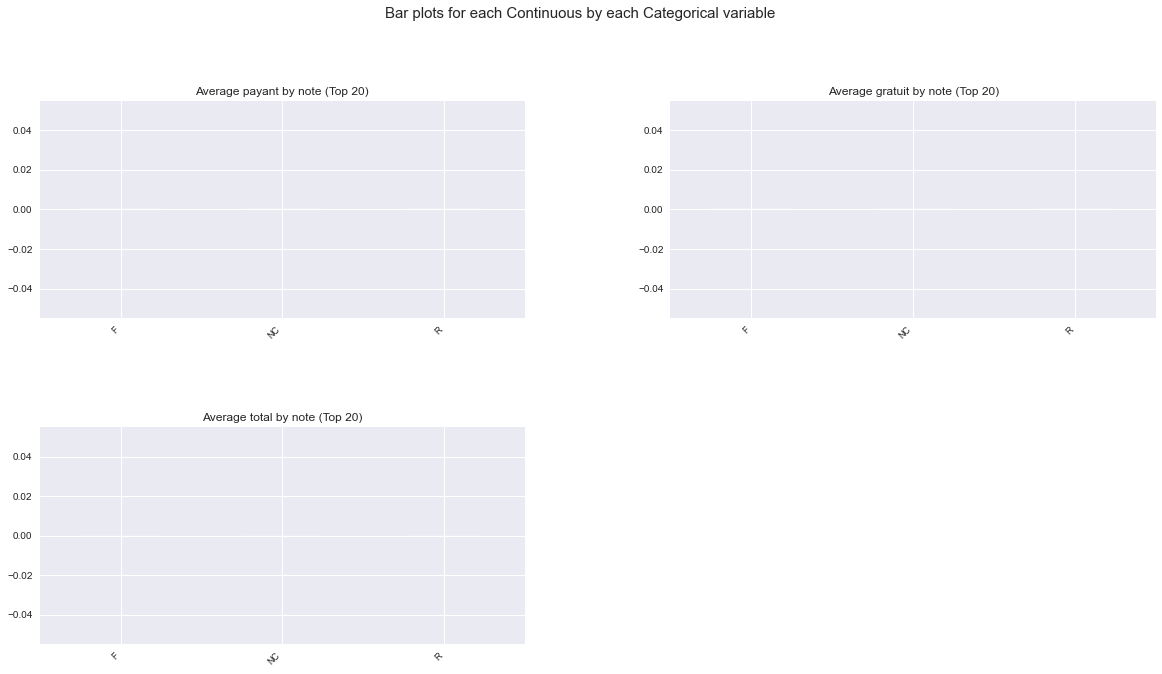

Time to run AutoViz (in seconds) = 11.089

 ###################### VISUALIZATION Completed ########################


In [7]:
AV = AutoViz_Class()
dft = AV.AutoViz(
    filename="data/frequentations.csv",
    sep=";",
    chart_format="svg"
)

## 5. La bibliothèque classique : Matplotlib

### 4. 1. Eléments saillants

`Matplotlib` s'appuie sur **deux philosophies sous-jacentes** qui permettent d'interagir avec la bibliothèque :
- L'approche **orientée objet** : il s'agit ici de créer explicitement les objets qui décrivent le graphique et d'appeler les méthodes de l'objet pour y ajouter les données et les éléments de légende
- L'approche **pyplot** : plus interactive, cette approche est plus simple et plus rapide et permet de prototyper rapidement des représentations graphiques

#### 4. 1. 1. Approche orientée objet

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Après avoir importé les bibliothèques nécessaires à la manipulation de nos données, affichons rapidement leur contenu pour en garder une trame générale en tête.

In [15]:
df_freq.head(2)

,ref_musee,nom_du_musee,annee,payant,gratuit,total
0,8109902,Muséum d'histoire naturelle Philadelphe Thomas,2009,789.0,3683.0,4472.0
1,8109903,Musée de l'Abbaye Saint-Michel,2009,2613.0,669.0,3282.0


In [16]:
df_musees.head(2)

,nom_du_musee,ref_musee,adr,ville,sitweb,region,departement,coordonnees_finales
0,Musée de la Résistance et de la Déportation de...,0126901,"3, Montée de l'Abbaye",NANTUA,www.musees.ain.fr,AUVERGNE-RHÔNE-ALPES,AIN,"46.152378,5.608744"
1,Musée des Manufactures de Dentelles,4316201,"14, avenue de la Gare",RETOURNAC,www.ville-retournac.fr/musee,AUVERGNE-RHÔNE-ALPES,HAUTE-LOIRE,"45.202545,4.035302"


Dans un premier temps, nous allons simplement afficher le nombre de musées par ville pour tenter de cerner comment se structure la répartition géographique des musées en France.

In [73]:
nb_musees_ville = df_musees["ville"].value_counts().head(5)
# .head() permet de récupérer les premiers éléments du tableau
nom_musees_ville = nb_musees_ville.index
# .index permet de récupérer la colonne d'en-tête du tableau

On peut afficher le contenu des variables que l'on vient de créer.

In [76]:
nb_musees_ville

PARIS         51
MARSEILLE     15
NICE          11
STRASBOURG    10
LYON          10
Name: ville, dtype: int64

In [77]:
nom_musees_ville

Index(['PARIS', 'MARSEILLE', 'NICE', 'STRASBOURG', 'LYON'], dtype='object')

Ici, on peut appeler explicitement la méthode de l'objet `pyplot` `.subplots()` qui permet de créer un couple **figure/axe** qui sont les deux "atomes" de `Matplotlib`.

L'objet `axes` de `Matplotlib` est celui qui représente une **fenêtre** qui contient un graphique. L'objet `figure` de `Matplotlib` contient, quant à lui, un nombre arbitraire de `axes` que l'on peut évidemment définir. Dans notre cas présent, nous allons simplement créer une `figure` qui contiendra un `axes`.

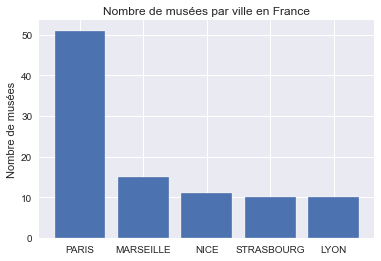

In [133]:
fig, ax = plt.subplots()
ax.bar(x=nom_musees_ville, height=nb_musees_ville)
ax.set_ylabel("Nombre de musées")
ax.set_title("Nombre de musées par ville en France");

Ici, nous avons utilisé la méthode `.bar()` de l'objet `pyplot` qui nous permet de créer automatique un **diagramme en bâtons**. On peut trouver ici [l'intégralité des paramètres](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html#matplotlib.axes.Axes.bar) qu'il est possible de passer à cette méthode pour adapter le résultat que l'on souhaite obtenir.

<div role="alert" class="alert alert-success">A noter au passage un léger détail, on peut ajouter `;` à la dernière méthode de notre bloc de code pour que `Matplotlib` n'affiche pas les détails de l'objet `pyplot` que l'on a créé en construisant notre graphique.</div>

#### 4. 1. 2. Approche pyplot

`Matplotlib` permet également de créer directement les graphiques sans se soucier de l'imbrication possible des `axes` et du paramétrage plus fin des `figures`.

Ainsi, lorsqu'on souhaite prototyper rapidement et visualiser des résultats pour soi, on peut aller très vite et produire un résultat en une seule ligne.

<BarContainer object of 5 artists>

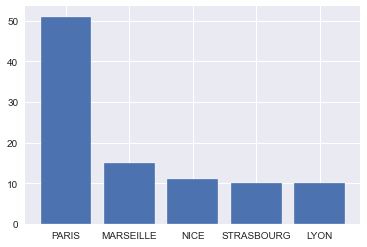

In [112]:
plt.bar(x=nom_musees_ville, height=nb_musees_ville)

Si on le souhaite, on peut très bien également adapter son graphique en passant des options supplémentaires : dans ce cas, on travaillera directement avec l'objet `pyplot`.

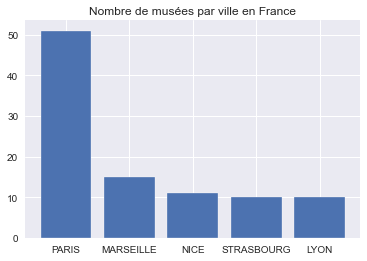

In [113]:
plt.bar(x=nom_musees_ville, height=nb_musees_ville)
plt.title("Nombre de musées par ville en France");

### 4. 2. Améliorer le premier jet

Conformément aux principes méthodologiques et pratiques que nous avons posé en préambule, prenons le temps de retravailler le résultat de ce premier jet en s'interrogeant :
1. Sur la question du message que l'on souhaite transmettre
2. Sur la pertinence des options par défaut
3. Sur le support auquel notre graphique pourrait s'adapter

#### 4. 2. 1. Quel est notre message ?

A première vue, en s'arrêtant au top 5 des villes françaises comptant le plus de musées, le message paraît assez clair : Paris domine de loin le classement et c'est ce sur quoi on voudrait insister à travers notre graphique.

En s'arrêtant rapidement sur les chiffres, on voit que la différence est de l'ordre de 1 à 5 : en additionnant le nombre de musées dans les quatre autres villes du top 5, on arrive pas à égaliser le nombre de musées que compte Paris.

En définitive, le message est assez simple et en ce sens, on peut identifier certains éléments que l'on peut modifier sur notre graphique :
* Retirer la grille de fond
* Retirer la couleur grise du fond qui n'apporte rien en terme de lisibilité ou de message

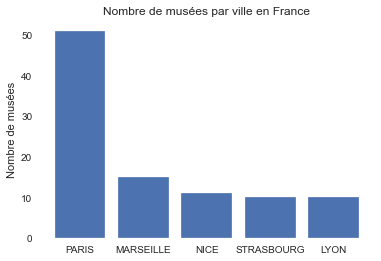

In [132]:
fig, ax = plt.subplots()
ax.bar(x=nom_musees_ville, height=nb_musees_ville)
ax.grid() # Retire la grille de fond
ax.set_facecolor("white") # Change la couleur de fond pour la définir en blanc
ax.set_ylabel("Nombre de musées")
ax.set_title("Nombre de musées par ville en France");

#### 4. 2. 2. Ne pas se limiter aux paramètres par défaut

Le deuxième point important lorsqu'on travaille avec des bibliothèques de visualisation de données qui embarquent toute une série de présupposés, d'éléments préconstruits, consiste à apprendre à s'en abstraire lorsque c'est nécessaire et explorer leur documentation pour personnaliser les rendus de nos graphiques en fonction de notre message, notre public, notre support.

Ici, la police est un peu en retrait, le titre est un peu petit par rapport aux autres éléments de légende et on pourrait certainement améliorer certaines choses en passant des paramètres complémentaires à nos fonctions qui permettent de construire le graphique.

Par ailleurs, le rendu visuel n'est pas forcément très propre : on peut voir certains pixels de certains éléments textuels de la légende, ce qui, au-delà du côté esthétique, rend aussi la lecture moins confortable.

Dans un premier temps, on peut tout d'abord essayer de hiérarchiser les éléments de légende de notre graphique.

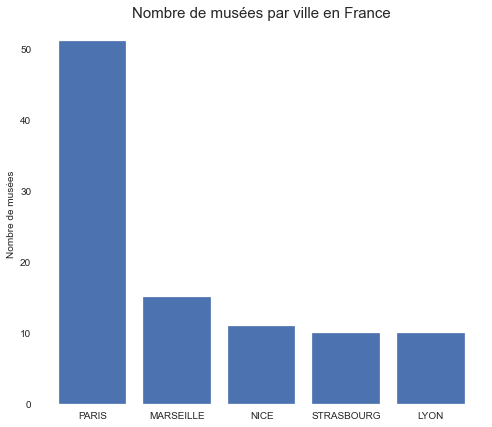

In [131]:
fig, ax = plt.subplots(figsize=(8, 7))
ax.bar(x=nom_musees_ville, height=nb_musees_ville)
ax.grid() # Retire la grille de fond
ax.set_facecolor("white") # Change la couleur de fond pour la définir en blanc
ax.set_ylabel("Nombre de musées", fontsize=10)
ax.set_title("Nombre de musées par ville en France", fontsize=15);

### 4. 3. Documentation

On trouvera toute la documentation nécessaire sur la bibliothèque `Matplotlib` à [cette adresse](https://matplotlib.org/stable/api/index.html) et une série de [tutoriels](https://matplotlib.org/stable/tutorials/index.html).

### 4. 4. Un tour d'horizon

### 4. 3. En somme

## 5. Altair

`Altair` est une bibliothèque de visualisation de données basée sur la **philosophie déclarative de Vega (*visualization grammar*)** que l'on peut facilement traduire sous la forme d'un **fichier JSON**.

**Vega**, et donc par extension `Altair`, s'appuie sur **D3.js**, une bibliothèque **JavaScript** également dédiée à la visualisation de données sous la forme d'objets vectoriels (au format SVG). Son objectif est d'offrir à la fois un outil de haut niveau pour produire rapidement des graphiques, mais également de permettre d'en ouvrir les entrailles et de pouvoir hautement personnaliser leur comportement et leur rendu.

Comme `Altair` s'appuie sur **JavaScript**, elle permet de produire des graphiques interactifs et adaptés au web.

In [8]:
import altair as alt